<a href="https://colab.research.google.com/github/Carvas91/ML_algorithms_practice/blob/main/sampling_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
airbnb = pd.read_csv('https://raw.githubusercontent.com/UofT-DSI/LCR/refs/heads/main/01_materials/notebooks/dataset/listings.csv')
airbnb.head(5)

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,13188.0,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,13358.0,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,13490.0,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,14267.0,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,16254.0,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36


In [4]:
airbnb["price"].mean() #population mean

249.16526273565984

In [5]:
np.random.seed(100)
airbnb.sample(40)["price"].mean()

222.875

In [10]:
#With no random seed
airbnb.sample(40)["price"].mean()

202.8

In [11]:
np.random.seed(100)

sample_list = []

for i in range(20_000):
    sample = airbnb.sample(40)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)


samples = pd.concat(sample_list)

In [12]:
samples.head(5)

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
3845,8.150000e+17,Oakridge,Entire home/apt,4,1.0,1.0,1.0,300,0
2182,4.562610e+07,Downtown,Entire home/apt,5,1.0,2.0,3.0,170,0
1543,3.427885e+07,Renfrew-Collingwood,Entire home/apt,6,2.0,3.0,3.0,140,0
211,4.418911e+06,Kitsilano,Entire home/apt,2,NaN,1.0,NaN,66,0
2511,5.118911e+07,Downtown,Entire home/apt,4,1.0,1.0,3.0,190,0


In [14]:
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name= 'sample_mean')

In [15]:
sample_estimates.head(5)

,replicate,sample_mean
0,0,222.875
1,1,315.250
2,2,191.000
3,3,232.400
4,4,243.025


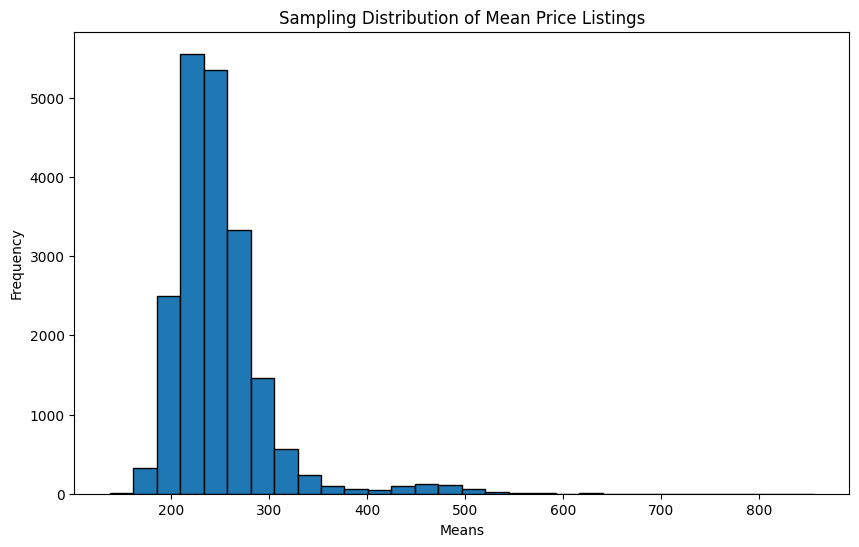

In [16]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')

# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()

##Bootstraping

In [17]:
np.random.seed(1234)

one_sample = airbnb.sample(40)
one_sample_mean = one_sample["price"].mean()
one_sample_mean

219.85

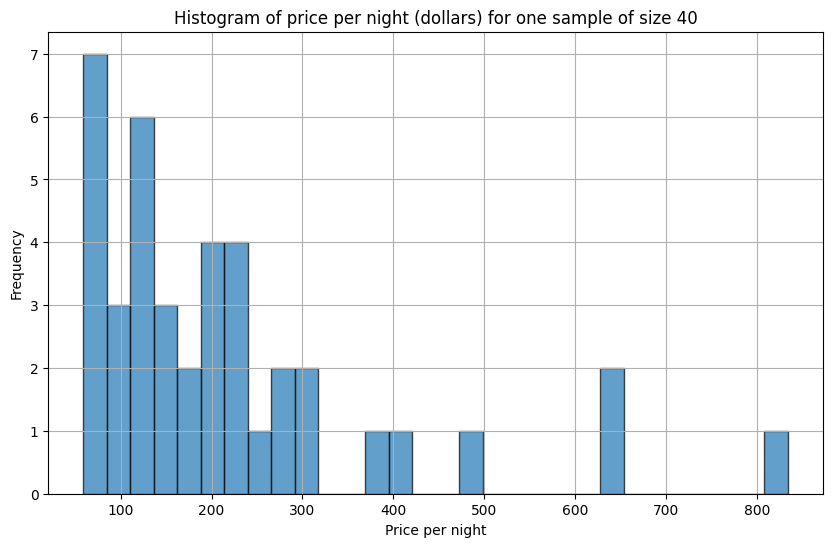

In [18]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [19]:
boot1 = one_sample.sample(frac=1, replace=True)


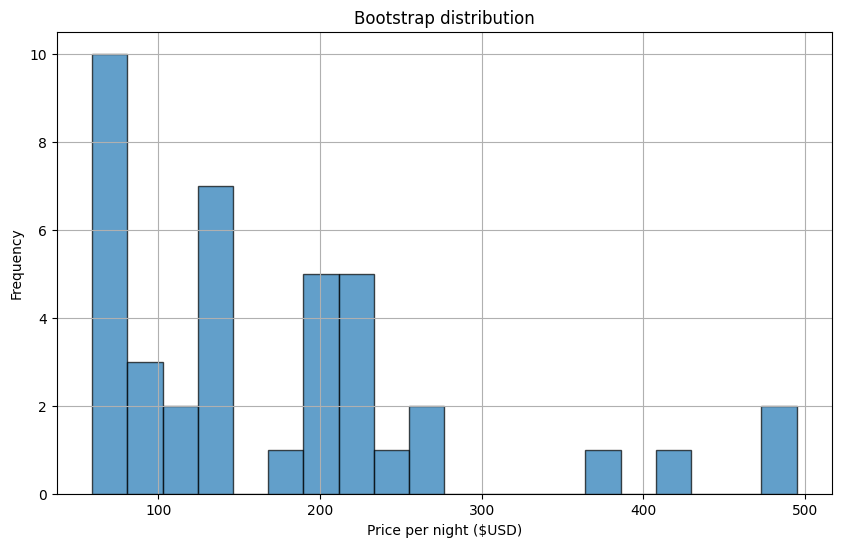

In [20]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [21]:
#Let's generate 20k bootstraps

bootstrap_samples = []

for i in range(20_000):
    sample = one_sample.sample(frac=1, replace=True)
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)

boot20000 = pd.concat(bootstrap_samples)

In [26]:
boot_mean = boot20000.groupby("replicate")["price"].mean().reset_index(name= 'mean_price')


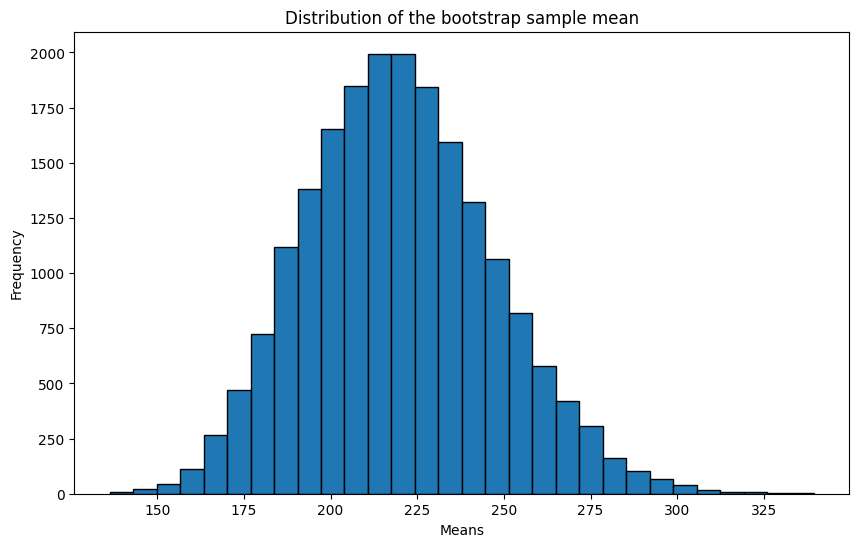

In [28]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_mean['mean_price'], bins=30, edgecolor='black')

# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [29]:
#compute confidence intervals
ci_bounds = boot_mean['mean_price'].quantile([0.025, 0.975])
ci_bounds

,mean_price
0.025,171.248750
0.975,276.300625
